<a href="https://colab.research.google.com/github/rpatel0022/Email-Spam-Classifier/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import pandas as pd

# Define the path to the zip file
zip_file_path = "/content/drive/MyDrive/archive.zip"

# Define the directory to extract to
extracted_dir = "/content/temp_extracted"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Assuming there's a single CSV file in the zip, find its path
# You might need to adjust this if there are multiple files or nested directories
import os
csv_files = [f for f in os.listdir(extracted_dir) if f.endswith('.csv')]

if csv_files:
    csv_file_path = os.path.join(extracted_dir, csv_files[0])
    # Load the CSV file into a pandas DataFrame
    try:
        df = pd.read_csv(csv_file_path, encoding='latin-1')
        print("CSV file loaded successfully!")
        display(df.head())
    except UnicodeDecodeError:
        print("Could not decode the file with 'latin-1' encoding. You might need to try a different encoding.")

else:
    print("No CSV files found in the extracted directory.")

CSV file loaded successfully!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
import numpy as np
import pandas as pd


In [10]:
import pandas as pd

# Define the path to the spam.csv file
spam_csv_path = "/content/temp_extracted/spam.csv"

# Load the CSV file into a pandas DataFrame
try:
    spam_df = pd.read_csv(spam_csv_path, encoding='latin-1')
    print("spam.csv loaded successfully!")
    display(spam_df.head())
except FileNotFoundError:
    print(f"Error: {spam_csv_path} not found. Make sure the file was extracted correctly.")
except UnicodeDecodeError:
    print("Could not decode the file with 'latin-1' encoding. You might need to try a different encoding.")
except Exception as e:
    print(f"An error occurred: {e}")

spam.csv loaded successfully!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
spam_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5174,ham,Water logging in desert. Geoenvironmental impl...,NaN,NaN,NaN
1838,spam,Hack Chat. Get backdoor entry into 121 chat ro...,NaN,NaN,NaN
1558,ham,Message from . I am at Truro Hospital on ext. ...,NaN,NaN,NaN
4815,ham,Anything is valuable in only 2 situations: Fir...,NaN,NaN,NaN
284,ham,Yeah I think my usual guy's still passed out f...,NaN,NaN,NaN


In [13]:
spam_df.shape

(5572, 5)

**1. Data Cleaning**

In [15]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
spam_df.sample(5)

,v1,v2
2949,ham,Where are you ? You said you would be here whe...
3219,ham,Its like that hotel dusk game i think. You sol...
4258,ham,Sad story of a Man - Last week was my b'day. M...
3327,ham,No we put party 7 days a week and study lightl...
1420,ham,No. She's currently in scotland for that.


In [22]:
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [23]:
spam_df.sample(5)

,target,text
3016,ham,One of the joys in lifeis waking up each daywi...
3304,ham,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...
5004,ham,Guess which pub im in? Im as happy as a pig in...
3665,ham,I'm turning off my phone. My moms telling ever...
4775,ham,Quite lor. But dun tell him wait he get compla...


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

spam_df['target'] = encoder.fit_transform(spam_df['target'])

In [28]:
spam_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
spam_df.isnull().sum()

,0
target,0
text,0


In [34]:
#Checking for duplicates

spam_df.duplicated().sum()
spam_df = spam_df.drop_duplicates(keep='first')

In [35]:
spam_df.duplicated().sum()

np.int64(0)

2. **Exploratory Data Analysis**

In [36]:
spam_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
spam_df['target'].value_counts()

,count
target,
0,4516
1,653


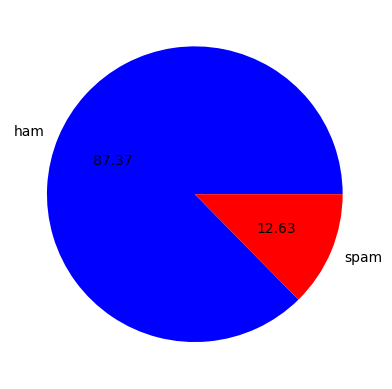

In [40]:
import matplotlib.pyplot as plt
plt.pie(spam_df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f", colors=['blue', 'red'])
plt.show()

In [42]:
!pip install nltk

In [51]:
import nltk #natural language tool kit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
spam_df['num_characters'] = spam_df['text'].apply(len)

In [46]:
spam_df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
spam_df['num_words'] = spam_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [55]:
spam_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
spam_df['num_sentences'] = spam_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [57]:
spam_df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [59]:
spam_df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
spam_df[spam_df['target'] == 0 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
spam_df[spam_df['target'] == 1 ][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [81]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

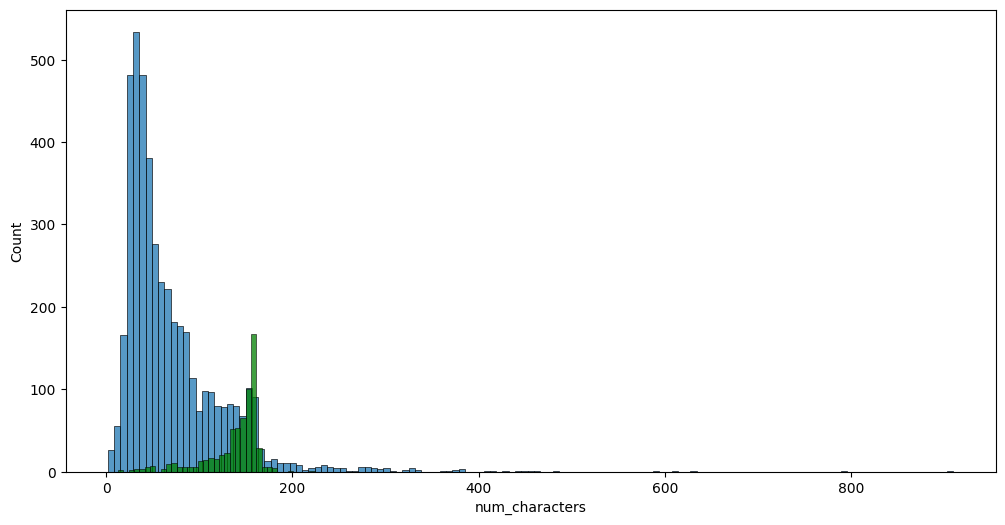

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(spam_df[spam_df['target'] == 0]['num_characters'])
sns.histplot(spam_df[spam_df['target'] == 1]['num_characters'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

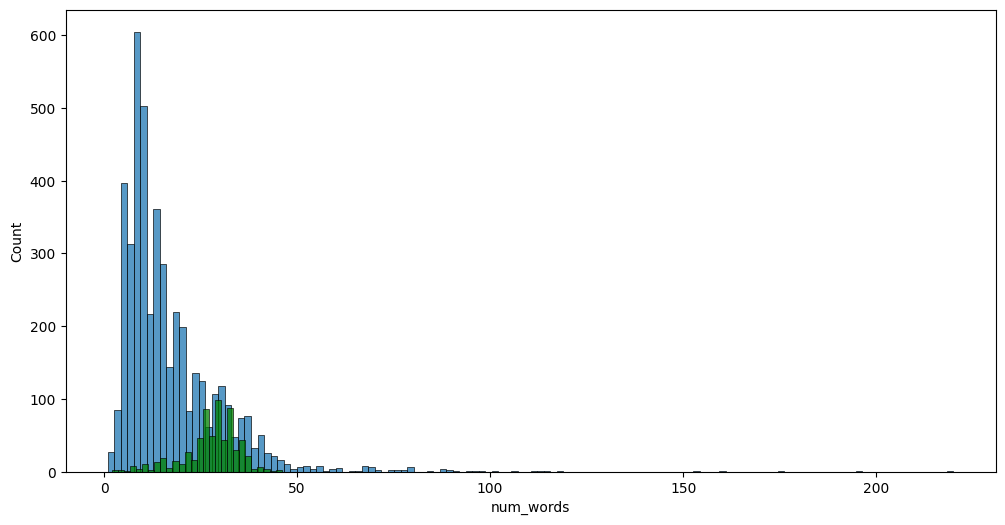

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(spam_df[spam_df['target'] == 0]['num_words'])
sns.histplot(spam_df[spam_df['target'] == 1]['num_words'], color='green')

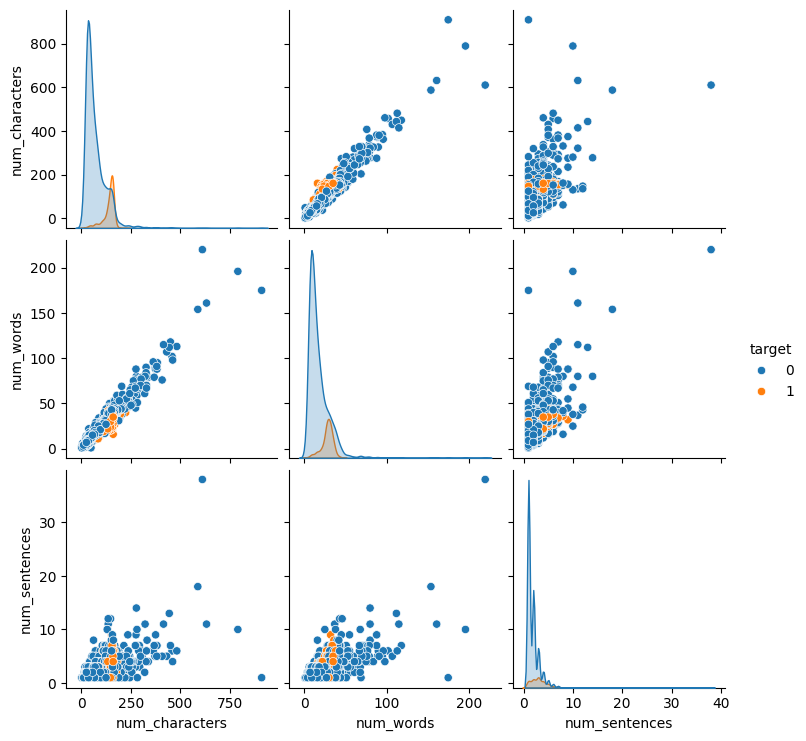

In [77]:
sns.pairplot(spam_df, hue='target')

In [84]:
spam_df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

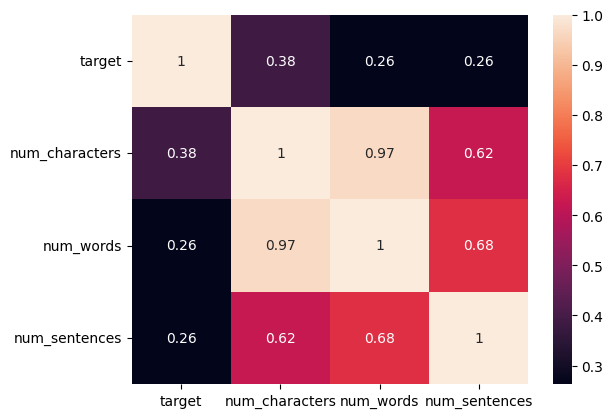

In [86]:
# Specify the desired order of columns
cols_order = ['target', 'num_characters', 'num_words', 'num_sentences']

# Calculate and plot the heatmap with the specified column order
sns.heatmap(spam_df[cols_order].corr(), annot=True)

In [ ]:
#EDA
#Text Preprocessing
#Model Building
#Evalulation
#Improvement based on evaluation
#Converting collection into a website
#Deployment of the website